# Chapter 

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

## Ex. 1 
Write a Python function that takes two vectors as input and provides two numbers as
output: the Pearson correlation coefficient and the cosine similarity value. Write code
that follows the formulas presented in this chapter; don’t simply call np.corrcoef and
spatial.distance.cosine. Check that the two output values are identical when the
variables are already mean centered and different when the variables are not mean
centered

In [27]:
# Create 2 vectors
x = np.array([5, 7, 15])
y = np.array([1, 10, 3 ])


In [33]:
def corrAndCos(x, y):
    # Compute Pearson correlation 
    # Remember that pearson corr can be thought as the dot product of the unit versions 2 mean centered vectors

    # Compute means
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Normalize vectors 
    x_norm = x - x_mean
    y_norm = y - y_mean

    # Compute unit vector for x 
    u_x = x_norm / np.linalg.norm(x_norm)

    # Compute unit vecctor for vector y 
    u_y = y_norm / np.linalg.norm(y_norm)

    # Compute dot product 

    x_dot_y = np.dot(u_x, u_y)

    # --------------------------------------------------------------------------------------------------------------
    # Cosine similarity 
    # Remember x dot y = |x||y|Cos(A)

    # Solving for Cos(A) feeding the normalized vectors 
    cos_A = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

    return x_dot_y, cos_A

In [34]:
print(corrAndCos(x, y))

(np.float64(-0.11996801279431377), np.float64(0.661681982918304))


## Ex 2
 Let’s continue exploring the difference between correlation and cosine similarity.
 Create a variable containing the integers 0 through 3, and a second variable equaling
 the first variable plus some offset. You will then create a simulation in which you
 systematically vary that offset between −50 and +50 (that is, the first iteration of the
 simulation will have the second variable equal to [−50, −49, −48, −47]). In a for
 loop, compute the correlation and cosine similarity between the two variables and
 store these results. Then make a line plot showing how the correlation and cosine
 similarity are affected by the mean offset. You should be able to reproduce Figure 4-4.

In [51]:
# create the variables
a = np.array([0, 1, 2, 3])
offsets = np.arange(-50,51)

# Define a vector to store the results 
results = np.zeros((len(offsets), 2))

for i in range(len(offsets)): 
    # Create second vector with offset 
    b = a + offsets[i]

    # Store the results
    results[i, :] = corrAndCos(a, b)

results[:10, :]

array([[ 1.        , -0.78779808],
       [ 1.        , -0.78749923],
       [ 1.        , -0.78718734],
       [ 1.        , -0.78686153],
       [ 1.        , -0.78652085],
       [ 1.        , -0.78616426],
       [ 1.        , -0.78579062],
       [ 1.        , -0.78539868],
       [ 1.        , -0.78498706],
       [ 1.        , -0.78455425]])

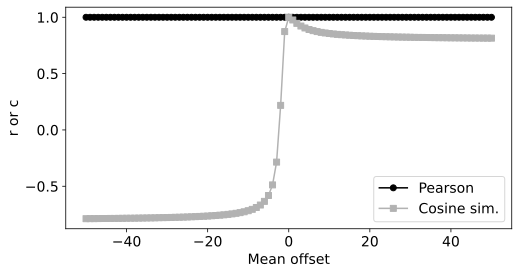

In [52]:
# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_04_02.png',dpi=300) # write out the fig to a file
plt.show()

## Ex 3
 There are several Python functions to compute the Pearson correlation coefficient.
 One of them is called pearsonr and is located in the stats module of the SciPy
 library. Open the source code for this file (hint: ??functionname) and make sure you
 understand how the Python implementation maps onto the formulas introduced in
 this chapter

In [53]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None, axis=0)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None, axis=0):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability 